In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [26]:
data = np.load('./crop/data_pca_25_y_mean.pickle.npz',allow_pickle=True)
data.files

['arr_0', 'arr_1', 'arr_2']

In [27]:
X = data['arr_0']
y = data['arr_1']
mean = data['arr_2']

In [28]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=object)

In [29]:
for i in range(len(y)):
    if y[i] == 1:
        y[i] = 'Ahmed'
    elif y[i] == 0:
        y[i] = 'Abdelrahman'
    elif y[i] == 3:
        y[i] = 'Waleed'
    elif y[i] == 2:
        y[i] = 'Ibrahim'

In [30]:
y

array(['Ahmed', 'Ahmed', 'Ahmed', 'Ahmed', 'Ahmed', 'Ahmed', 'Ahmed',
       'Ahmed', 'Ahmed', 'Ahmed', 'Ahmed', 'Ahmed', 'Ahmed', 'Ahmed',
       'Ahmed', 'Ahmed', 'Ahmed', 'Ahmed', 'Abdelrahman', 'Abdelrahman',
       'Abdelrahman', 'Abdelrahman', 'Abdelrahman', 'Abdelrahman',
       'Abdelrahman', 'Abdelrahman', 'Abdelrahman', 'Abdelrahman',
       'Abdelrahman', 'Abdelrahman', 'Abdelrahman', 'Abdelrahman',
       'Abdelrahman', 'Abdelrahman', 'Abdelrahman', 'Abdelrahman',
       'Waleed', 'Waleed', 'Waleed', 'Waleed', 'Waleed', 'Waleed',
       'Waleed', 'Waleed', 'Waleed', 'Waleed', 'Waleed', 'Waleed',
       'Waleed', 'Waleed', 'Waleed', 'Waleed', 'Waleed', 'Waleed',
       'Waleed', 'Waleed', 'Ibrahim', 'Ibrahim', 'Ibrahim', 'Ibrahim',
       'Ibrahim', 'Ibrahim', 'Ibrahim', 'Ibrahim', 'Ibrahim', 'Ibrahim',
       'Ibrahim', 'Ibrahim', 'Ibrahim', 'Ibrahim', 'Ibrahim', 'Ibrahim',
       'Ibrahim', 'Ibrahim', 'Ibrahim', 'Ibrahim'], dtype=object)

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60, 35), (16, 35), (60,), (16,))

In [32]:
from sklearn.svm import SVC

In [33]:
model = SVC(C=1.0,kernel='rbf',gamma=0.01,probability=True)

In [34]:
model.fit(x_train,y_train)
print("model trained successfully")

model trained successfully


In [35]:
model.score(x_train,y_train)

0.8833333333333333

In [36]:
model.score(x_test,y_test)

0.75

# Hyper parameters Tuning

In [37]:
model_tune = SVC() 

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
param_grid = {'C':[1,10,20,30,50,100],
             'kernel':['rbf','poly'],
             'gamma':[0.1,0.05,0.01,0.001,0.002,0.005],
             'coef0':[0,1]}
model_grid = GridSearchCV(model_tune,param_grid=param_grid, scoring='accuracy',cv = 5,verbose = 2)

In [40]:
model_grid.fit(X,y)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] END ................C=1, coef0=0, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ................C=1, coef0=0, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ................C=1, coef0=0, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ................C=1, coef0=0, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ................C=1, coef0=0, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ...............C=1, coef0=0, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ...............C=1, coef0=0, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ...............C=1, coef0=0, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ...............C=1, coef0=0, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ...............C=1, coef0=0, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ...............C=1, coef0=0, gamma=0.05, kernel=rbf; total time=   0.0s
[CV] END ...............C=1, coef0=0, gamma=0.

[CV] END ..............C=10, coef0=0, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ..............C=10, coef0=0, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ..............C=10, coef0=0, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ..............C=10, coef0=0, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ..............C=10, coef0=0, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END .............C=10, coef0=0, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .............C=10, coef0=0, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .............C=10, coef0=0, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .............C=10, coef0=0, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .............C=10, coef0=0, gamma=0.01, kernel=poly; total time=   0.0s
[CV] END .............C=10, coef0=0, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .............C=10, coef0=0, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .............C=10, 

[CV] END .............C=20, coef0=0, gamma=0.002, kernel=rbf; total time=   0.0s
[CV] END .............C=20, coef0=0, gamma=0.002, kernel=rbf; total time=   0.0s
[CV] END .............C=20, coef0=0, gamma=0.002, kernel=rbf; total time=   0.0s
[CV] END .............C=20, coef0=0, gamma=0.002, kernel=rbf; total time=   0.0s
[CV] END .............C=20, coef0=0, gamma=0.002, kernel=rbf; total time=   0.0s
[CV] END ............C=20, coef0=0, gamma=0.002, kernel=poly; total time=   0.0s
[CV] END ............C=20, coef0=0, gamma=0.002, kernel=poly; total time=   0.0s
[CV] END ............C=20, coef0=0, gamma=0.002, kernel=poly; total time=   0.0s
[CV] END ............C=20, coef0=0, gamma=0.002, kernel=poly; total time=   0.0s
[CV] END ............C=20, coef0=0, gamma=0.002, kernel=poly; total time=   0.0s
[CV] END .............C=20, coef0=0, gamma=0.005, kernel=rbf; total time=   0.0s
[CV] END .............C=20, coef0=0, gamma=0.005, kernel=rbf; total time=   0.0s
[CV] END .............C=20, 

[CV] END .............C=30, coef0=0, gamma=0.002, kernel=rbf; total time=   0.0s
[CV] END .............C=30, coef0=0, gamma=0.002, kernel=rbf; total time=   0.0s
[CV] END .............C=30, coef0=0, gamma=0.002, kernel=rbf; total time=   0.0s
[CV] END ............C=30, coef0=0, gamma=0.002, kernel=poly; total time=   0.0s
[CV] END ............C=30, coef0=0, gamma=0.002, kernel=poly; total time=   0.0s
[CV] END ............C=30, coef0=0, gamma=0.002, kernel=poly; total time=   0.0s
[CV] END ............C=30, coef0=0, gamma=0.002, kernel=poly; total time=   0.0s
[CV] END ............C=30, coef0=0, gamma=0.002, kernel=poly; total time=   0.0s
[CV] END .............C=30, coef0=0, gamma=0.005, kernel=rbf; total time=   0.0s
[CV] END .............C=30, coef0=0, gamma=0.005, kernel=rbf; total time=   0.0s
[CV] END .............C=30, coef0=0, gamma=0.005, kernel=rbf; total time=   0.0s
[CV] END .............C=30, coef0=0, gamma=0.005, kernel=rbf; total time=   0.0s
[CV] END .............C=30, 

[CV] END ............C=50, coef0=0, gamma=0.005, kernel=poly; total time=   0.0s
[CV] END ............C=50, coef0=0, gamma=0.005, kernel=poly; total time=   0.0s
[CV] END ............C=50, coef0=0, gamma=0.005, kernel=poly; total time=   0.0s
[CV] END ............C=50, coef0=0, gamma=0.005, kernel=poly; total time=   0.0s
[CV] END ............C=50, coef0=0, gamma=0.005, kernel=poly; total time=   0.0s
[CV] END ...............C=50, coef0=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ...............C=50, coef0=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ...............C=50, coef0=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ...............C=50, coef0=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ...............C=50, coef0=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ..............C=50, coef0=1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ..............C=50, coef0=1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END ..............C=50,

[CV] END .............C=100, coef0=1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .............C=100, coef0=1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .............C=100, coef0=1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .............C=100, coef0=1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .............C=100, coef0=1, gamma=0.1, kernel=poly; total time=   0.0s
[CV] END .............C=100, coef0=1, gamma=0.05, kernel=rbf; total time=   0.0s
[CV] END .............C=100, coef0=1, gamma=0.05, kernel=rbf; total time=   0.0s
[CV] END .............C=100, coef0=1, gamma=0.05, kernel=rbf; total time=   0.0s
[CV] END .............C=100, coef0=1, gamma=0.05, kernel=rbf; total time=   0.0s
[CV] END .............C=100, coef0=1, gamma=0.05, kernel=rbf; total time=   0.0s
[CV] END ............C=100, coef0=1, gamma=0.05, kernel=poly; total time=   0.0s
[CV] END ............C=100, coef0=1, gamma=0.05, kernel=poly; total time=   0.0s
[CV] END ............C=100, 

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 20, 30, 50, 100], 'coef0': [0, 1],
                         'gamma': [0.1, 0.05, 0.01, 0.001, 0.002, 0.005],
                         'kernel': ['rbf', 'poly']},
             scoring='accuracy', verbose=2)

In [41]:
model_grid.best_params_

{'C': 30, 'coef0': 0, 'gamma': 0.005, 'kernel': 'rbf'}

In [42]:
model_grid.best_score_

0.6066666666666667

In [43]:
# with best parameters
model_best = SVC(C=30,kernel='rbf',gamma = 0.005,probability=True)

In [44]:
model_best.fit(x_train,y_train)
model_best.score(x_test,y_test)

0.75

In [45]:
y_pred = model_best.predict(x_test)
y_prob = model_best.predict_proba(x_test) # proability

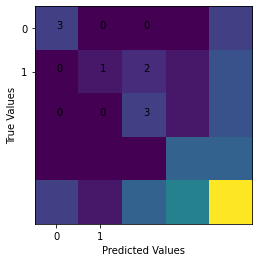

In [46]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,y_pred)
cm = np.concatenate((cm,cm.sum(axis=0).reshape(1,-1)),axis=0)
cm = np.concatenate((cm,cm.sum(axis=1).reshape(-1,1)),axis=1)
plt.imshow(cm)
for i in range(3):
    for j in range(3):
        plt.text(j,i,'%d'%cm[i,j])
        
plt.xticks([0,1])
plt.yticks([0,1])
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

In [47]:
import pickle
pickle.dump(model_best,open('./crop/model_svm.pickle','wb'))

In [48]:
pickle.dump(mean,open('./crop/mean_preprocess.pickle','wb'))